1.
Study the asymmetric tent map, namely the linear map with peak at $x=c$, $c\neq0.5$
- Draw the histogram of a large number of iterated values.
- Calculate $\lambda$ as time average or space average.

Text(0.5, 0, 'x')

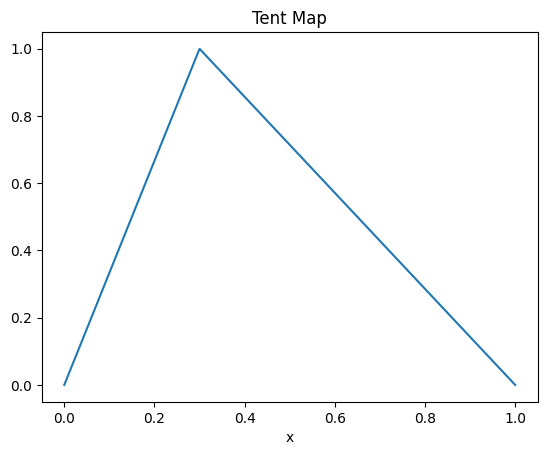

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tent_map(x, c):
    """Tent map function."""
    if x < c:
        return x / c
    else:
        return (1 - x) / (1 - c)


c = 0.3  # Asymmetry parameter, c ≠ 0.5
N = 1000  # Number of iterations
x = np.random.rand()  # Initial value

#plot the map
x_values = np.linspace(0, 1, 1000)
y_values = [tent_map(x, c) for x in x_values]
plt.plot(x_values, y_values, label='Tent Map')
plt.title('Tent Map')
plt.xlabel('x')

Text(0, 0.5, 'Density')

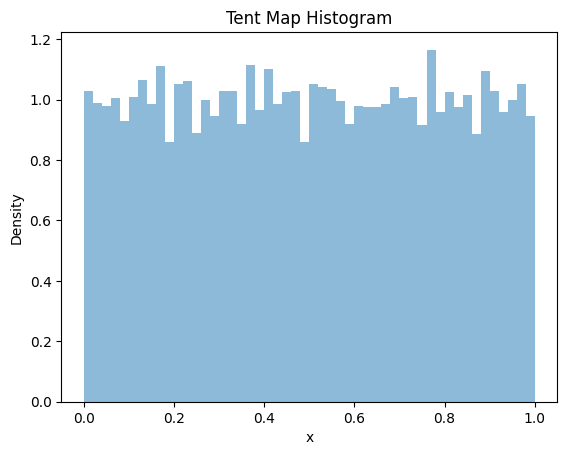

In [8]:
#Histogram of the map
N = 10000
x = np.random.rand()

x_values = []
for i in range(N):
    x = tent_map(x, c)
    x_values.append(x)
plt.hist(x_values, bins=50, density=True, alpha=0.5, label='Histogram')
plt.title('Tent Map Histogram')
plt.xlabel('x')
plt.ylabel('Density')

The Lyapunov exponent can be calculated as time average using the equation
$$\lambda=\lim_{t\rightarrow\infty}\frac{1}{t}\sum_{k=0}^{t-1}\log |f'(x_k)|\;.$$

Text(0.5, 1.0, 'Asymmetric Tent Map Derivative (c=0.3)')

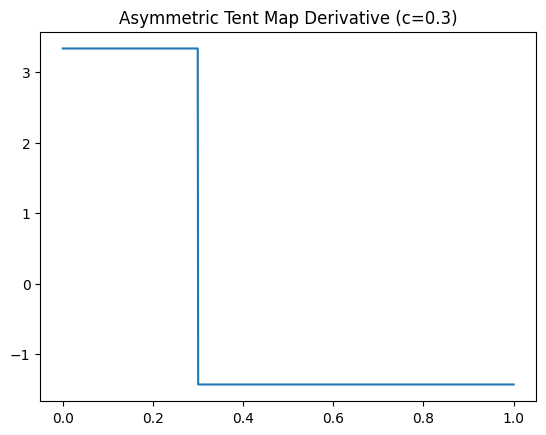

In [10]:
def analitical_deriv(x,c):
    if x<c: return 1/c        
    else: return -1/(1-c) 
# Plot the derivative
x_values = np.linspace(0, 1, 1000)
y_values = [analitical_deriv(x, c) for x in x_values]
plt.plot(x_values, y_values, label='Analytical Derivative')
plt.title(f"Asymmetric Tent Map Derivative (c={c})")    

In [13]:
t=100000
x=np.random.rand()
logsum=0
for k in range(t):
    logsum+=np.log(abs(analitical_deriv(x,c)))
    x=tent_map(x,c)
print("Lyapunov exponent",logsum/t)


Lyapunov exponent 0.6119657892738157


2.
For the same map
- Check that an iterated density converges to the invariant one.
  For this purpose represent the density on a grid of x values.
- Determine the second eigenvalue by subtracting the contribution
  of the leading eigenfunction and rescaling the difference in each step.

# Solution:
We want to use the equation
$$p_0(x)\rightarrow p_1(x)=\sum_{z:f(z)=x}\frac{p(z)}{f'(z)}=\hat F p_0(x)$$
for the evolution of the density.
For this purpose we need to determine which grid points correspond to the preimages of a gridpoint.
Since the density of the gridpoints is $1/n$ the gridpoint $i$ corresponds to $x=i/n$ .
Its left preimage is $c*i/n$ . Devided by $1/n$ the index of the closest gridpoint is obtained:
$$ j \approx \frac{c\cdot i/n}{1/n} = c\cdot i $$
If this is not integer it has to be rounded to get the index of the nearest gridpoint.
The index of the right preimage can be similarly obtained and used up in the iteration of the density as

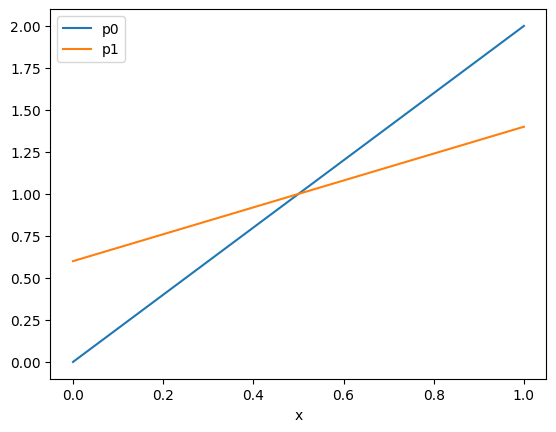

In [106]:
# Question 2

# how to calculate the evolution of a probability density
# by the Frobenius-Perron operator of the asymmetric tent map
c=0.7# an arbitrary value for the parameter of the map
# we want to generate gridpoints  x_k=k/n, k=0,1,2,...,n
n=10000                # the largest gridpoint index
x=np.linspace(0,1,n+1)   # the gridpoints
p0=np.linspace(0,2,n+1)  # the list of the values of an initial density at the grid points



def FP(p):
    p1=np.zeros(n+1)          # create an array in which the values of the resulting density will be stored

    for i in range(n+1):             # i.e. i=0,1,2,...,n
        j=round(i*c)                 # left preimage index
        k=round(n-i*(1-c))           # right preimage index
        p1[i]=p[j]*c + p[k]*(1-c)  # the sum of the contribution of the two branches
    return p1



plt.plot(x,p0,label="p0")
plt.plot(x,FP(p0),label="p1")
plt.legend()
plt.xlabel("x");    

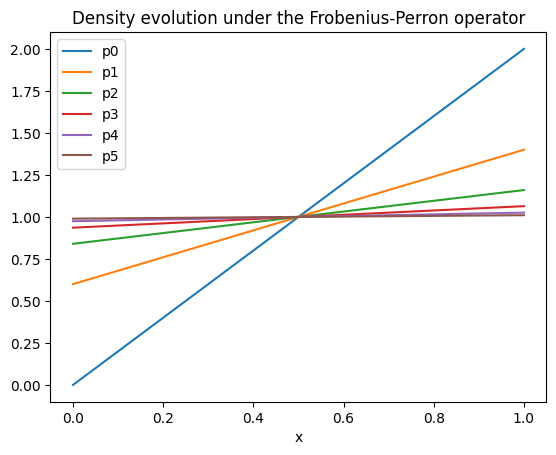

In [107]:
p=p0
plt.plot(x,p,label="p0")    # plot the initial density
for k in range(1,6):
    p=FP(p)                     # iterate the density
    plt.plot(x,p,label="p"+str(k))  # plot the k times iterated density
plt.title("Density evolution under the Frobenius-Perron operator")    
plt.legend()
plt.xlabel("x");

Text(0.5, 1.0, 'Density evolution under the Frobenius-Perron operator')

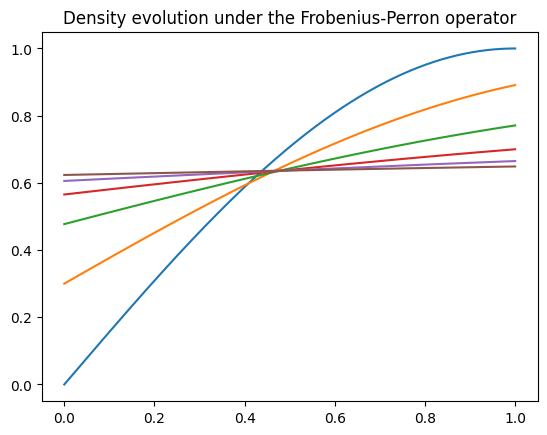

In [110]:
p = np.sin(np.pi/2*x)  # a sine function
plt.plot(x, p, label="p0")  # plot the initial density
for k in range(1, 6):
    p = FP(p)  # iterate the density
    plt.plot(x, p, label="p" + str(k))  # plot the k times iterated density
plt.title("Density evolution under the Frobenius-Perron operator")


decay rate 0.3633938895524603
decay rate 0.7000437331935044
decay rate 0.528111408399256
decay rate 0.47179672018195207
decay rate 0.4462679974757406
decay rate 0.43376876438829254


Text(0.5, 0, 'x')

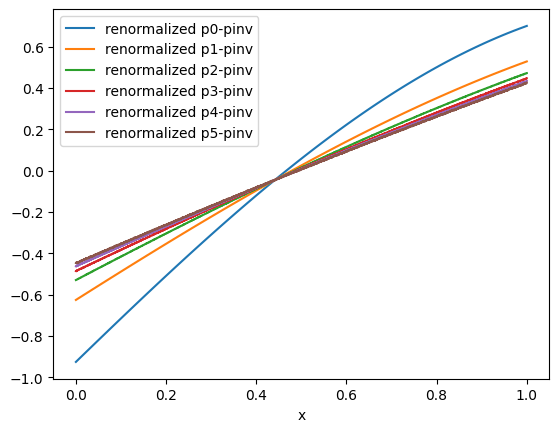

: 

In [ ]:

p=np.sin(np.pi/2*x)      # non-linear initial density
for k in range(0,6):
    p=p-np.mean(p)                  # here we subtract the contribution of pinv
    print("decay rate", max(p))  # this measures the deviation of p_k from pinv
    p=p/max(p)                   # this normalization ensures that the print shows the rate of the decay
    p=FP(p)                      # iterate the modified density
    plt.plot(x,p,label="renormalized p"+str(k)+"-pinv")
plt.legend()
plt.xlabel("x")

   3.
For the same map
- Study the decay of correlations. As a first try use $A(x)=x$.

4.
Study the open asymmetric tent map which increases from 0 to 1 in [0,a] and decreases from 1 to 0 in [1-b,1].<br>
You should take into account that using forward iteration the longer you iterate the more initial points are needed. You may use instead backward iteration, choosing one of the two branches randomly in each steps with proper probabilities. In this case you can find out the proper probabilities by studying the effect of the first few steps of iterations.
- Draw the repeller as a histogram of the distribution, and draw the cumulative distribution function.
- Calculate the fractal dimension.